# `snewpy.snowglobes` Usage Example

This notebook demonstrates how to use SNEWPY with SNOwGLoBES.

To start, make sure you have SNOwGLoBES installed and have downloaded one of the models that are part of SNEWPY. Adjust the directory paths in the following cell.

In [1]:
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
import os
from snewpy import snowglobes

SNOwGLoBES_path = None  # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "C:/Users/M_bum/.astropy/cache/snewpy/models"  # directory containing SNEWPY models
#"C:\Users\M_bum\.astropy\cache\snewpy\models"

Next, we will set up some basic parameters for the supernova we want to simulate.

In [2]:
# set distance in kpc
distance = 50

# set SNOwGLoBES detector to use
detector = "wc100kt30prct"

# set SNEWPY model type and filename
modeltype = 'Nakazato_2013'
model = 'nakazato-shen-z0.004-t_rev100ms-s20.0.fits'

# set desired flavor transformation
#transformation = 'AdiabaticMSW_NMO'
transformation = 'AdiabaticMSW_NMO'

# Construct file system path of model file and name of output file
# The output file will be stored in the same directory as the model file.
modelfile = SNEWPY_models_base + "/" + modeltype + "/" + model 
outfile = modeltype+"_"+model+"_"+transformation

# There are three ways to select a time range.
# Option 1 - don't specify tstart and tend, then the whole model is integrated
#tstart = None
#tend = None

# Option 2 - specify single tstart and tend, this makes 1 fluence file integrated over the window
"""tstart = 0.7 * u.s
tend = 0.8 * u.s"""

#Option 3 = specify sequence of time intervals, one fluence file is made for each interval
'''window_tstart = 0.0
window_tend = 0.3
window_bins = 600'''
window_tstart = 0.0
window_tend = 0.3
window_bins = 600
tstart = np.linspace(window_tstart, window_tend, window_bins, endpoint=False) * u.s
tend = tstart + (window_tend - window_tstart) / window_bins * u.s
tmid = (tstart + tend) * 0.5

print(tstart.to(u.ms))
print(tend.to(u.ms))
print(tmid.to(u.ms))


[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

Now that everything’s set up, let’s start using SNOwGLoBES! Be patient—these three steps together may take a few minutes.

In [3]:
# snowglobes.generate_fluence integrates the model over the specified time window(s)
# and generates input files for SNOwGLoBES. It returns the full file path of the output file.
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype, transformation, distance, outfile, tstart, tend)
# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)
# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)
print("Available keys in tables:", tables.keys())

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


C:\Users\M_bum\AppData\Local\Programs\Python\Python312\Lib\site-packages\snewpy\snowglobes.py:140: UserWarning: Argument `filename` is deprecated.
  snmodel = model_class(model_path, **snmodel_dict)


Collating results ...
Available keys in tables: dict_keys(['wc100kt30prct', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_0_wc100kt30prct_events_smeared_weighted.dat', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_0_wc100kt30prct_events_unsmeared_weighted.dat', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_1_wc100kt30prct_events_smeared_weighted.dat', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_1_wc100kt30prct_events_unsmeared_weighted.dat', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_2_wc100kt30prct_events_smeared_weighted.dat', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_2_wc100kt30prct_events_unsmeared_weighted.dat', 'Collated_Nakazato_2013_nakazato-shen-z0.004-t_rev100ms-s20.0.fits_AdiabaticMSW_NMO_3_wc100kt30prct_events_smeared_weighted.dat', 'Collate

Finally, since we chose option 3 above, and calculated the fluence in 60 time bins, we can now plot the event counts over time.

In [4]:
%matplotlib inline

nevents = np.zeros(len(tmid))
for i in range(len(tmid)):
    key = f"Collated_{outfile}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(len(tables[key]['header'].split())):
        nevents[i] += 0.32*sum(tables[key]['data'][j])

# nevents is per bin, convert to per ms
factor = window_bins / (window_tend - window_tstart) / 1000
print(sum(nevents))

1979.8703182303216


In [5]:
file_path ='Sevent_nom.npy'
if os.path.exists(file_path):
    Sevent_loaded = np.load(file_path)
else:
    print(f"File {file_path} not found.")

In [6]:
Sevent=nevents * factor
np.save('Sevent_nom.npy', Sevent)
print(Sevent)

[6.43200774 6.43200774 6.43200868 6.43200868 6.43200976 6.43200976
 6.432011   6.432011   6.43201243 6.43201243 6.43201407 6.43201407
 6.43201596 6.43201596 6.43201814 6.43201814 6.43202066 6.43202066
 6.43202357 6.43202357 6.43202696 6.43202696 6.43203096 6.43203096
 6.43203602 6.43203602 6.43204396 6.43204396 6.43206051 6.43206051
 6.43210033 6.43210033 6.43219538 6.43219538 6.43240506 6.43240506
 6.43282383 6.43282383 6.43358288 6.43358288 6.43484086 6.43484086
 6.43676064 6.43676064 6.43947565 6.43947565 6.44305244 6.44305244
 6.44748121 6.44748121 6.45270515 6.45270515 6.45865735 6.45865735
 6.46528073 6.46528073 6.47251951 6.47251951 6.48029891 6.48029891
 6.48851176 6.48851176 6.4970173  6.4970173  6.50565714 6.50565714
 6.51427594 6.51427594 6.52273641 6.52273641 6.53092963 6.53092963
 6.53877887 6.53877887 6.54623783 6.54623783 6.55328779 6.55328779
 6.55993105 6.55993105 6.56618377 6.56618377 6.57206905 6.57206905
 6.5776126  6.5776126  6.58283695 6.58283695 6.58776426 6.5877

[2.5000e-04 7.5000e-04 1.2500e-03 1.7500e-03 2.2500e-03 2.7500e-03
 3.2500e-03 3.7500e-03 4.2500e-03 4.7500e-03 5.2500e-03 5.7500e-03
 6.2500e-03 6.7500e-03 7.2500e-03 7.7500e-03 8.2500e-03 8.7500e-03
 9.2500e-03 9.7500e-03 1.0250e-02 1.0750e-02 1.1250e-02 1.1750e-02
 1.2250e-02 1.2750e-02 1.3250e-02 1.3750e-02 1.4250e-02 1.4750e-02
 1.5250e-02 1.5750e-02 1.6250e-02 1.6750e-02 1.7250e-02 1.7750e-02
 1.8250e-02 1.8750e-02 1.9250e-02 1.9750e-02 2.0250e-02 2.0750e-02
 2.1250e-02 2.1750e-02 2.2250e-02 2.2750e-02 2.3250e-02 2.3750e-02
 2.4250e-02 2.4750e-02 2.5250e-02 2.5750e-02 2.6250e-02 2.6750e-02
 2.7250e-02 2.7750e-02 2.8250e-02 2.8750e-02 2.9250e-02 2.9750e-02
 3.0250e-02 3.0750e-02 3.1250e-02 3.1750e-02 3.2250e-02 3.2750e-02
 3.3250e-02 3.3750e-02 3.4250e-02 3.4750e-02 3.5250e-02 3.5750e-02
 3.6250e-02 3.6750e-02 3.7250e-02 3.7750e-02 3.8250e-02 3.8750e-02
 3.9250e-02 3.9750e-02 4.0250e-02 4.0750e-02 4.1250e-02 4.1750e-02
 4.2250e-02 4.2750e-02 4.3250e-02 4.3750e-02 4.4250e-02 4.4750

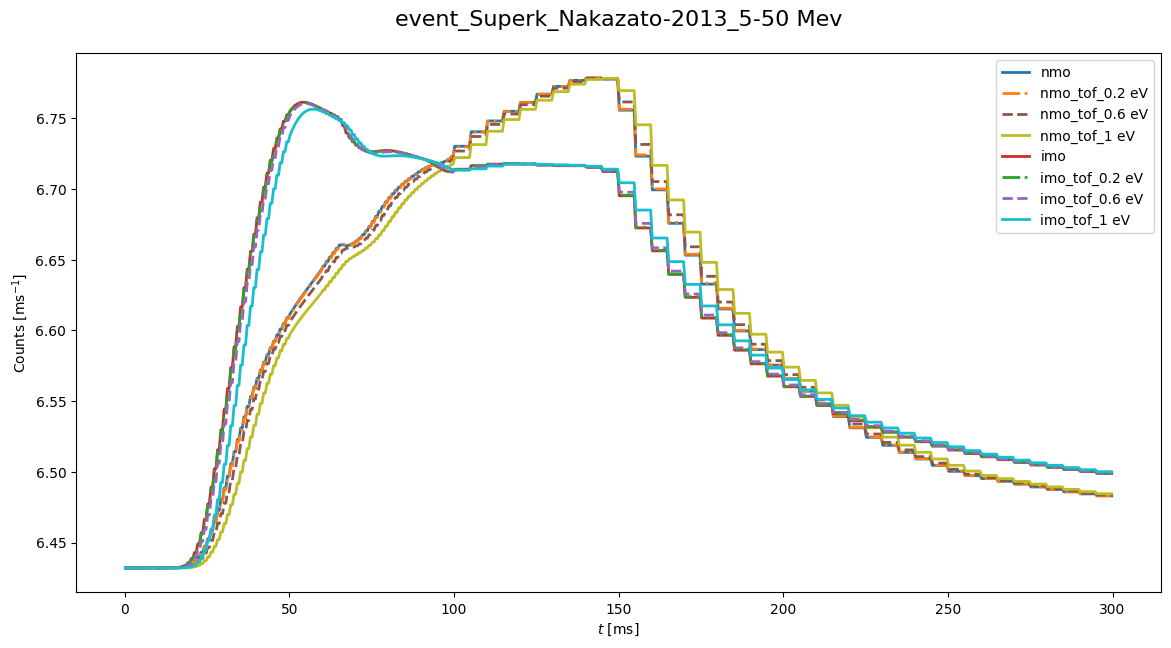

Total Events: 1979.8703182303216


'#3672.7520573374827'

In [9]:
Sevents_loaded0 = np.load('Sevent_nom.npy')
Sevents_loaded01 = np.load('Sevent_iom.npy')
Sevents_loaded1 = np.load('Sevent_nom_0.2.npy')
Sevents_loaded11 = np.load('Sevent_iom_0.2.npy')
Sevents_loaded2 = np.load('Sevent_nom_0.5.npy')
Sevents_loaded21 = np.load('Sevent_iom_0.5.npy')
Sevents_loaded3 = np.load('Sevent_nom_1.npy')
Sevents_loaded31 = np.load('Sevent_iom_1.npy')
plt.figure(figsize=(14, 7))
time_limit =0.4 * u.s
print(tmid)
mask = (tmid) <= time_limit
plt.title('event_Superk_Nakazato-2013_5-50 Mev', fontsize=16, pad=20)
plt.plot(tmid[mask]*1000* u.ms , Sevents_loaded0[mask],label='nmo',lw=2, ls='-',color='C0' )
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded1[mask],label='nmo_tof_0.2 eV',lw=2, ls='-.',color='C1')

plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded2[mask],label='nmo_tof_0.6 eV',lw=2, ls='--',color='C5')

plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded3[mask],label='nmo_tof_1 eV',lw=2, ls='-',color='C8')

plt.plot(tmid[mask]*1000* u.ms , Sevents_loaded01[mask],label='imo',lw=2, ls='-',color='C3' )
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded11[mask],label='imo_tof_0.2 eV',lw=2, ls='-.',color='C2')

plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded21[mask],label='imo_tof_0.6 eV',lw=2, ls='--',color='C4')

plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded31[mask],label='imo_tof_1 eV',lw=2, ls='-',color='C9')


"""
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded11[mask],label='iom_tof_0.2 eV',lw=2, ls='-.',color='C2')
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded2[mask],label='nom_tof_0.6 eV',lw=2, ls='--',color='C5')
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded21[mask],label='iom_tof_0.6 eV',lw=2, ls='--',color='C4')
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded3[mask],label='nom_tof_1 eV',lw=2, ls='-',color='C8')
plt.plot(tmid[mask]*1000 * u.ms, Sevents_loaded31[mask],label='iom_tof_1 eV',lw=2, ls='-',color='C9')

"""

#print(nevents * factor)


plt.xlabel("$t$ [ms]")

plt.ylabel("Counts [ms$^{-1}$]")
plt.legend()
plt.show()

# compare to Figure 5 of Zha et al. (2021)
print("Total Events:", sum(nevents))
"#3672.7520573374827"

In [8]:

#Total Events: 59958.29755536029